# NumPy
-------








Muitos trabalhos aplicados em empresa envolvem cálculos matemáticos avançados, e por isso precisam se apoiar em alguma biblioteca. Quer trabalhemos com estatística, aprendizado de máquina, processamento de imagem, de texto, de áudio, com otimização, ou até simulação de sistemas reais, uma boa biblioteca matemática é fundamental.

No Python, a biblioteca [**NumPy**][NumPy_docs] (abreviação para *Numerical Python* [\[2\]](#2)) faz esse papel. Ela é uma poderosíssima biblioteca matemática, e é um dos cernes da computação científica e ciência de dados em Python.

Os cálculos realizados pelo NumPy são baseados em operações com os chamados Arrays Multidimensionais (em matemática, chamamos de vetores, matrizes ou tensores). Esses objetos fundamentais da biblioteca são basicamente "listas de listas de listas de ...". O NumPy implementa operações nesses objetos de forma eficiente, em uma linguagem de mais baixo nível (linguagem C), o que confere a eles enorme velocidade e eficiência. Nós aproveitamos essa eficiência através da interface amigável que a biblioteca possui em Python.

Quando organizamos nosso código para aproveitar as operações do NumPy, é comum dizermos que nós "vetorizamos" o nosso código. Isso significa que evitamos loops explícitos no código Python, e reescrevemos tudo usando os arrays do NumPy. Assim, conseguimos aproveitar toda a velocidade das operações "vetorizadas", acelerando muito o nossos código.

A esmagadora maioria das bibliotecas de Python para computação científica, processamento de dados e ciência de dados (como por exemplo, SciPy, pandas, scikit-learn e statsmodels) se apoiam nas funcionalidades do NumPy [\[2\]](#2).


    

1. [Instalação](#1instalacao)
2. [Introdução ao NumPy](#2introducao)
    1. [Cuidados iniciais: Como copiar arrays](#21copiar)
    2. [Propriedades de ndarrays](#22propriedades)
    3. [Acessando e modificando elementos (Indexing & Slicing)](#23indexing)
    4. [Máscara Booleana e Seleção Avançada](#24boolmask)
    5. [Métodos built-in de criação de arrays](#25arraycreate)
O argumento é o formato do ndarray resultante. [](#)
O argumento é o formato do array resultante. [](#)
3. [Matemática com NumPy](#3matematica)
    1. [Broadcasting](#31broadcasting)
    2. [Funções matemáticas](#32funcoesmath)
4. [Álgebra Linear e Estatística básica](#4algelinestat)
    1. [Álgebra Linear](#41algelin)
    2. [Estatística](#42estat)

## 1. Instalação  <a name="1instalacao"></a>

Como falamos antes, o NumPy nada mais é que uma biblioteca do Python. Dito isso, para instalarmos ele, fazemos de forma semelhante a qualquer outra biblioteca Python.

Entre as diversas formas de fazer isso, a mais simples é instalar o pacote Anaconda (https://www.anaconda.com/distribution/). Ele já vem com o Python e diversas bibliotecas científicas e de ciência de dados instaladas. Se preferir reinstalar depois, o Anaconda provê também o gerenciador de pacotes Conda, e assim é possível intalar o NumPy através do terminal.


In [ ]:
#$ conda install numpy

Caso prefira, você também pode instalar via o gerenciador de pacotes nativo do Python, o `pip`.  Para isso, utilizamos o comando abaixo via terminal.

In [ ]:
#$ pip install numpy

Para quem for usuário com maior conhecimento de programação e computação científica, recomenda-se uma lida nas [instruções de instalação mais detalhadas do NumPy][NumPy_install].

O maior motivo para isso é o fato de que, por trás dos panos, o NumPy utiliza as chamadas "bibliotecas de álgebra linear acelerada", que pode ser tanto a biblioteca Intel MKL quanto a biblioteca OpenBLAS. Em algumas situações, é importante escolher qual das duas será usada pela sua instalação do NumPy.

Embora existam questões de performance computacionais para essa escolha, existem também motivos de negócio. A biblioteca Intel MKL não é de código fonte aberto, e sua licença pode não permitir alguns tipos de distribuição do código que você esteja desenvolvendo com o NumPy.

## 2. Introdução ao NumPy  <a name="2introducao"></a>



A primeira coisa que precisamos fazer para usar o NumPy em um código, é importar a biblioteca. A importação funciona como qualquer outra biblioteca Python, porém o alias `np` para a biblioteca é amplamente utilizado pela comunidade de usuários do Python. A importação então é sempre feita da forma abaixo.

In [ ]:
import numpy as np

Com esse alias, o nosso código fica bem menor, facilitando para outras pessoas entenderem ele depois. Como o alias é comum na comunidade, ele também não gera confusões, e permite sabermos sempre quando alguma operação feita é nativa do NumPy.

Na introdução, comentamos que a estrutura de dados básica do NumPy é um "array multidimensional". Esse objeto do NumPy se chama **ndarray**. Um mnemônico para ajudar a lembrar é lembrar pensar em "N Dimensões ARRAY", ou "NDARRAY". Basta lembrar que o "nd" significa "n-dimensional", pois também podemos ter tabelas multidimensionais.

Essa estrutura é semelhante aos arrays de outras linguagens de programação. Pode ser uma lista de valores, uma tabela, ou uma tabela de tabelas. O importante é que todos os valores são do mesmo "tipo". Se um deles é um número inteiro, todos serão. Se um deles for um float, todos serão. Esse tipo é chamado de **dtype**, e é, inclusive, um atributo de objetos arrays do NumPy.

O mais comum é usarmos ndarrays como listas ou tabelas de valores.

No caso de uma lista, nós temos um ndarray de uma dimensão. Matematicamente, esse objeto é equivalente a um vetor.

O método mais comum de criar um ndarray é usando a função `np.array`. Assim, para criar nosso "vetor", usamos o comando abaixo.

In [2]:
vetor = np.array([1, 2, 3])
print(vetor)

[1 2 3]


In [5]:
vetor[2]

3

Se olharmos o tipo da variável `vetor`, veremos que ela é do tipo `NumPy.ndarray`.

In [3]:
print(type(vetor))

<class 'numpy.ndarray'>


Podemos criar também uma tabela com duas dimensões. Nesse caso, temos uma matriz.

In [6]:
matriz = np.array([[1, 2], [3, 4]])
print(matriz)

[[1 2]
 [3 4]]


É possível, também, aumentar o número de dimensões. Nesse caso, se tivermos 3 dimensões, por exemplo, teríamos uma lista de tabelas. Se forem 4 dimensões, então temos uma tabela cujos elementos são tabelas. Assim, quanto mais dimensões, nós vamos empilhando em uma lista objetos com menos dimensões. Se forem 5 dimensões, temos uma lista de ndarrays de 4 dimensões (ou uma lista de tabelas de tabelas).

Matematicamente, quando temos 3 dimensões ou mais, é comum nos referirmos a esse objeto como um *tensor*.

In [7]:
tensor = np.array([[[1, 2], [3, 4]], [[1, 0],[0, 1]]])
print(tensor)

[[[1 2]
  [3 4]]

 [[1 0]
  [0 1]]]


Note que a variável `tensor` nada mais é que duas tabelas.

Uma representação visual de ndarrays podem ajudar a entender melhor o que está acontecendo.

![NumPy_ndarray](https://s3-sa-east-1.amazonaws.com/lcpi/b50bd331-732b-48a4-9d46-01f20c15ab29.png "ndarrays"){width="400" height="450"}

(**Fonte:** Imagem adaptada da original, disponível pela ABRACD [\[5\]](#5))

O *ndarray* é a estrutura de dados básica do NumPy, e a que usaremos sempre. A partir dela que toda a "matemágica" acontece. Todo o poder do NumPy vem da implementação desse tipo de array e as operações relacionadas, que são mais eficientes que usar variáveis do tipo `list` em Python (embora ndarrays sejam menos flexíveis).

Esses objetos também são muito comuns em matemática, pois representam basicamente vetores e matrizes. Assim, é bem direto "vetorizar" nosso código escrevendo-o de forma bem parecida com como faríamos em notação matemática.

Obs: Falamos antes também de tensores. Não é importante entender o que eles são para poder usar o NumPy. Apenas cálculos muito específicos se utilizam da matemática de tensores. Para a maioria dos casos, basta ter a visão que demos acima, sobre como eles são basicamente "matrizes com 3 ou mais dimensões", que pode ser facilmente entendido como “mais ou 3 índices”. Isso é, sempre que tivermos algum objeto com 3 índices, sabemos que é um 3-tensor. Isso significa que eles podem ser uma lista de tabelas, uma tabela de tabelas, uma lista de tabelas de tabelas, uma tabela de tabelas de tabelas, e por aí vai...

### 2.1. Cuidados iniciais: Como copiar arrays  <a name="21copiar"></a>

Antes de começar a ver as propriedades básicas de um ndarray, é importante ter uma questão muito importante em mente. Assim como os arrays nativos do Python, devido à forma como o NumPy trabalha com ndarrays na memória do computador, eles se comportam da forma mostrada abaixo.

In [8]:
a = np.array([1, 2, 3])
b = a
b

array([1, 2, 3])

In [9]:
a

array([1, 2, 3])

In [10]:
b[0] = 100
b

array([100,   2,   3])

In [11]:
a

array([100,   2,   3])

Note que no bloco de código, a variável `a` foi modificada depois que alteramos a variável `b`! Isso acontece porque ambas as variáveis apontam para o mesmo endereço de memória do computador. Quando fazemos `b[0] = 100`, estamos alterando o valor do primeiro elemento de `b` na memória. Como `a[0]` aponta para o mesmo lugar na memória, ele vai passar a ver o valor novo. Logo, teremos que seu valor será `100`.

Por este motivo, sempre que queremos copiar um array de uma variável para outra, usamos o método `copy()`.

In [12]:
a = np.array([1, 2, 3])
b = a.copy()
b

array([1, 2, 3])

In [13]:
b[0] = 100
b

array([100,   2,   3])

In [14]:
a

array([1, 2, 3])

O método `copy()` copia todos os valores do array para um novo endereço de memória. Assim, a variável `b` passa a apontar para esse novo endereço, e evitamos o problema anterior.

### 2.2. Propriedades de ndarrays  <a name="22propriedades"></a>


#### Dimensão e formato

Como vimos antes, é possível criar um ndarray com diferentes dimensões e formatos. Cada ndarray tem os atributos `ndim` e `shape` que guardam estas informações. Logo, para sabermos como é o nosso array, basta acessar esses atributos.

In [15]:
vetor

array([1, 2, 3])

In [16]:
print(vetor.ndim)

print(vetor.shape)

1
(3,)


In [17]:
matriz

array([[1, 2],
       [3, 4]])

In [19]:
matriz_2 = np.array([[1,2,3],[4,5,6]])

In [20]:
print(matriz_2.ndim)
print(matriz_2.shape)

2
(2, 3)


In [21]:
print(matriz.ndim)
print(matriz.shape)

2
(2, 2)


In [23]:
tensor

array([[[1, 2],
        [3, 4]],

       [[1, 0],
        [0, 1]]])

In [24]:
tensor_2 = np.array([[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]])

In [26]:
tensor_2

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [25]:
print(tensor_2.ndim)
print(tensor_2.shape)

3
(2, 2, 3)


In [30]:
tensor_2

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [31]:
tensor_2[0,1,2]

6

In [22]:
print(tensor.ndim)
print(tensor.shape)

3
(2, 2, 2)


Isso é extremamente importante para nos ajudar quando temos um ndarray muito grande, e precisamos relembrar o quão grande. Além disso, esses atributos também nos ajudam quando queremos criar funções genéricas que atuem em ndarrays.

A partir do formato do array, podemos obter também o número de elementos. Porém, objetos ndarray já têm o atributo `size` para facilitar.

In [32]:
print(vetor.size)
print(matriz.size)
print(tensor.size)

3
4
8


Muitas vezes queremos mudar o formato de um array. Por exemplo, podemos querer transformar um vetor de 4 elementos em uma matriz 2x2. Para isso, utilizamos a função `reshape`.

In [35]:
before_vector = np.array([1,2,3,4])

In [38]:
print(before_vector)
print(before_vector.shape)
print(before_vector.ndim)

[1 2 3 4]
(4,)
1


In [47]:
before_vector_2 = np.array([1,2,3,4,5,6])

In [48]:
before_vector_2.reshape(2,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [39]:
after_vector = before_vector.reshape(2,2)

In [43]:
after_vector

array([[1, 2],
       [3, 4]])

In [42]:
after_vector.shape

(2, 2)

In [49]:
before = np.array([[1,2,3,4],[5,6,7,8]])
print(before.shape)

(2, 4)


In [53]:
after = before.reshape((8)) # o novo array deve ter a mesma quantidade de elementos
after

array([1, 2, 3, 4, 5, 6, 7, 8])

In [54]:
after = before.reshape((8, 1))
after

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [55]:
after = before.reshape(2, 2, 2)
after

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

Outra forma de obter arrays com dimensões ou formatos diferentes é juntar e empilhar arrays. Podemos tanto empilhar um array em cima do outro (um "empilhamento vertical") usando a função `np.vstack`, quanto tentar colocar um ao lado do outro (um "empilhamento horizontal") usando a função `np.hstack`.

In [56]:
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])
np.vstack([v1, v2])

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [58]:
np.hstack((v1, v2))

array([1, 2, 3, 4, 5, 6, 7, 8])

In [59]:
v1 + v2

array([ 6,  8, 10, 12])

In [57]:
np.vstack([v1, v2, v2, v2])

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [5, 6, 7, 8],
       [5, 6, 7, 8]])

In [60]:
h1 = np.array([[1, 1, 1, 1],
                   [1, 1, 1, 1]])

In [63]:
h1

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

In [61]:
h2 = np.zeros((2,2))

In [64]:
h2

array([[0., 0.],
       [0., 0.]])

In [65]:
np.hstack((h2,h1))

array([[0., 0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.]])

É comum falarmos de cada dimensão de um ndarray como um "eixo". Assim, se um ndarray tem 3 dimensões, nós podemos falar da "1ª dimensão do array" (o eixo 0 do array), da "2ª dimensão do array" (o eixo 1 do array) e da "3ª dimensão do array" (eixo 2 do array). Assim, um ndarray com formato `(3, 3, 2)` seria uma lista ao longo do seu primeiro eixo (eixo 0). Essa lista seria composta por 3 matrizes de tamanho 3 x 2. De forma totalmente equivalente, a gente poderia pensar que ele é uma lista com 2 matrizes 3 x 3 ao longo do seu terceiro eixo (eixo 2).

In [66]:
a = np.array(range(18))
b = a.reshape((3, 3, 2)).copy()
b

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]]])

A variável `b` vai ser um "cubo" de valores, invés de uma tabela. Assim, o que muda é só qual eixo a gente está olhando.

![NumPy_ndarray](https://s3-sa-east-1.amazonaws.com/lcpi/1e527c6a-ea64-46e3-bd31-ffba06749000.png "ndarrays"){width="600" height="450"}

(**Fonte:** Imagem original Ada)

#### Tipos de dados e tamanho em memória



Um array do NumPy tem a propriedade `dtype`, que nos dá o tipo dos seus elementos mais básicos.

In [67]:
vetor = np.array([1, 2, 3, 4, 5, 6, 7])
vetor.dtype

dtype('int32')

Quando nós construímos o ndarray, se não passarmos explicitamente qual é o `dtype`, ele infere a partir dos valores que passamos.

In [68]:
vetor = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
vetor.dtype

dtype('float64')

Para passar esse parâmetro explicitamente, basta utilizar um segundo argumento na função `np.array`.

In [69]:
vetor = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], dtype=np.int32)
vetor.dtype

dtype('int32')

In [70]:
vetor

array([1, 2, 3, 4, 5, 6, 7])

Para esses arrays, nós dizemos que a consistência dos dados é **forte**. Isso significa que, se criarmos um vetor de números inteiros, por exemplo, então todos os elementos que colocarmos no nosso vetor **vai ser inteiro**.

Se tentarmos colocar um valor numérico de ponto flutuante, o NumPy vai automaticamente converter para um valor inteiro.

In [71]:
a = np.array([1, 2, 3])
a[0] = 10
a

array([10,  2,  3])

In [72]:
a[0] = 1.23
a

array([1, 2, 3])

O valor padrão de *dtype* depende do Python instalado. Se o Python instalado for de 64 bits, o padrão será tipos `int` ou `float` de 64 bits de memória (`int64` ou `float64`). Caso seu Python seja 32 bits, o padrão será `int32` e `float32`.

Essa diferença afeta a precisão dos cálculos. Quanto mais espaço em memória utilizado (maior o número de bits), maior a precisão.

Como o NumPy é feito para cálculos numéricos, ele precisa de grande controle sobre essa precisão. De fato, ele precisa de mais controle sobre isso do que o Python básico.

Devido a isso, os tipos de dados numéricos básicos do NumPy parecem com os do Python, mas em geral têm um número à direita. Esse número representa o seu nível de precisão computacional.

Alguns exemplos de tipos de dados do NumPy (e provavelmente os mais comuns) são:

* `np.int32`
* `np.int64`
* `np.float32`
* `np.float64`

Como exemplo, podemos criar uma outra array, `a16`, com o tipo inteiro de 16 bits.

In [73]:
a16 = np.array([1, 2, 3], dtype=np.int16)
a16

array([1, 2, 3], dtype=int16)

Note que por ser um tipo diferente do padrão, ele ressalta ao mostrar o array na tela.

Para descobrir o espaço que cada elemento ocupa na memória, individualmente, podemos acessar o atributo `itemsize`.

In [74]:
a16.itemsize

2

In [79]:
?a16.itemsize

Type:        int
String form: 2
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4

Ele retornou 2! Mas a gente não falou que era um tipo inteiro de "16 bits"?

O NumPy nos mostra o espaço em memória em bytes, e não em bits. Cada byte equivale a 8 bits. Logo, 16 bits são o mesmo que 2 bytes.

$$\frac{16}{8} = 2$$

Já se fizermos um array padrão em um Python de 64 bits, temos um `itemsize` de 8.

In [75]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [76]:
a.itemsize

4

Isso pois o padrão de 64 bits equivale a 8 bytes.
$$\frac{64}{8} = 8$$

A quantidade de elementos multiplicado pelo tamanho de cada elemento em memória nos dará o tamanho total de bytes que o array inteiro ocupa na memória do computador.

In [80]:
# quantidade de elementos total
a.size

3

In [81]:
# tamanho em memória do vetor "a"
a.size * a.itemsize

12

Não precisamos, porém, ficar calculando esse valor se quisermos saber essa informação. Podemos simplesmente acessar o atributo `nbytes`, que representa o tamanho total em bytes ocupado pelo array.

In [82]:
a.nbytes

12

---

**Observação**

Geralmente não é necessário reduzir o número de bits a não ser que você tenha certeza que um tamanho reduzido vai atender sua necessidade e você quer ser **extremamente** eficiente.

---
Podemos converter os tipos de dados do array do NumPy depois da sua criação de forma manual, usando a função `astype`.

In [86]:
vetor_4 = np.array([1,2,3,4])

In [87]:
vetor_4.dtype

dtype('int32')

In [83]:
a = np.array([1., 2., 3.])
a.dtype

dtype('float64')

In [84]:
b = a.astype('int32').copy()
b

array([1, 2, 3])

In [85]:
b.dtype

dtype('int32')

### 2.3. Acessando e modificando elementos (Indexing & Slicing)  <a name="23indexing"></a>






Vamos montar duas matrizes, uma usando Python e outra usando NumPy, para podermos comparar como nós acessamos os elementos de cada uma.

In [88]:
lista = [
         [1,2,3],
         [4,5,6]
         ]

In [89]:
lista

[[1, 2, 3], [4, 5, 6]]

In [91]:
lista[1][1]

5

In [94]:
lista[1,1]

TypeError: list indices must be integers or slices, not tuple

In [92]:
lista_array = np.array(lista)

In [93]:
lista_array[1,1]

5

In [95]:
np_mat = np.array([[1, 2,  3,  4,  5,  6,  7],
                       [8, 9, 10, 11, 12, 13, 14]])

In [96]:
print(np_mat)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]]


In [97]:
py_mat = [[1, 2,  3,  4,  5,  6,  7],
              [8, 9, 10, 11, 12, 13, 14]]

In [98]:
print(py_mat)

[[1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14]]


Podemos acessar um elemento específico de forma similar a uma lista natural do Python, utilizando a sintaxe de colchetes. Porém, no NumPy, quando temos 2 ou mais dimensões, nós passamos a posição que queremos buscar atráves de números separados por vírgulas.

Se quisermos então pegar o número 13 nos arrays acima, que está na posição \[1,5\] (linha 1, coluna 5, lembrando que o Python começa os índices sempre pelo 0), no Python teríamos que usar a sintaxe abaixo.

In [99]:
py_mat[1][5]

13

Já para um ndarray com duas dimensões (2D), temos uma sintaxe um pouco mais simples.

In [100]:
np_mat[1,5]

13

Além disso, todas as regras do Python são aplicáveis no NumPy. Usar números negativos, por exemplo, funciona como uma indexação de trás para frente.

In [101]:
np_mat[1, -2]

13

Para pegar uma linha inteira, podemos utilizar a sintaxe de `:` na coluna. Essa sintaxe pode ser lida como "todos os elementos deste eixo". Podemos ler então a sintaxe abaixo como "linha zero, todas as colunas".

In [102]:
np_mat[0, :]

array([1, 2, 3, 4, 5, 6, 7])

Embora também poderíamos fazer de forma mais fácil essa indexação em específico.

In [103]:
np_mat[0]

array([1, 2, 3, 4, 5, 6, 7])

Porém, para pegar uma coluna, não tem jeito, precisamos usar `:`. A sintaxe abaixo pode ser lida como "todas as linhas, coluna 2".

In [105]:
np_mat[:, 2]

array([ 3, 10])

O operador `:` é também conhecido como slicing (ou "fatiamento", em português), e pode ser usado para pegar intervalos de índices. Para isso, ele precisa de três parâmetros:
- start, o índice inicial do intervalo
- end, o índice final do intervalo
- step, quantos índices nós pulamos em cada passo dado para ir do *start* até o *end*.

Isso é feito no formato `[start:end:step]`. Neste caso, `step` é o tamanho do passo que vamos dar. Basicamente, ele diz quantos elementos devemos pular de cada vez. Como exemplo, podemos pegar do elemento 1 ao 6 pulando de 2 em 2 na linha 0.

In [107]:
np_mat

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14]])

In [106]:
np_mat[0, 1:6:2]

array([2, 4, 6])

In [111]:
np_mat[0,1:6:2]

array([2, 4, 6])

Novamente, ele também funciona com índice negativo.

In [112]:
np_mat[0, 1:-1:2]

array([2, 4, 6])

Podemos usar essas indexações para alterar os elementos do array. Basta usar o operador `=` para atribuir um novo falar ao elemento daquela posição.

In [115]:
np_mat[1,5] = 20
print(np_mat)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 20 14]]


In [116]:
np_mat[1,5]

20

Isso vale até para colunas ou linhas inteiras.

In [118]:
np_mat[:, 2] = 5
print(np_mat)

[[ 1  2  5  4  5  6  7]
 [ 8  9  5 11 12 20 14]]


In [117]:
np_mat

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 20, 14]])

Isso acontece por uma característica fundamental do array do NumPy:

<b><center>Ao alterar o pedaço recortado da matriz (o "slice" da matriz), você altera a matriz original.</center></b>

Juntando com o problema que vimos antes, de cópia de array, quando queremos copiar um slice de um array, temos que explicitamente usar o método `copy`.

In [125]:
lista = [1,2,3,4,5]

In [126]:
slice_lista = lista[2:]

In [128]:
slice_lista[0] = 72

In [129]:
slice_lista

[72, 4, 5]

In [130]:
lista

[1, 2, 3, 4, 5]

In [119]:
a = np.array([1, 2, 3])

b = a[1:].copy()
b

array([2, 3])

In [120]:
a

array([1, 2, 3])

In [121]:
c = a[1:]
c

array([2, 3])

In [122]:
c[0] = 5
c

array([5, 3])

In [123]:
a

array([1, 5, 3])

In [124]:
b

array([2, 3])

### 2.4. Máscara Booleana e Seleção Avançada  <a name="24boolmask"></a>

In [131]:
import array

Uma outra forma de seleção é por meio de uma lista de posições.

In [133]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
a[[1, 2, -1]]

array([2, 3, 9])

No caso de arrays multidimensionais, vamos ter que passar uma lista para cada dimensão. O NumPy nos retornará os elementos formados pelos pares (se 2D, se for 3D são trincas, se 4D quadras, etc.) dessas listas.

In [134]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3,3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [135]:
a[[0, 0, 2],[1, 2, 2]]

array([2, 3, 9])

Uma outra forma muito comum de selecionar elementos de um ndarray é usando o que chamamos de "máscara booleana". Ela nada mais é do que um array de elementos booleanos ("True" ou "False"). Tanto faz se for uma lista do Python ou um ndarray do NumPy.

Assim, quando passamos essa máscara para um array do NumPy, ele nos retorna apenas as posições onde temos o valor "True".

In [136]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])#.reshape(3,3)
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [137]:
a[[True, True, False, False, False, False, False, True, False]]

array([1, 2, 8])

In [139]:
a[a >5]

array([6, 7, 8, 9])

Note, no exemplo acima, que temos 3 posições onde nossa máscara possui valor "True". A posição 0, a posição 1, e a posição 7, que correspondem aos valores 1, 2, e 8, respectivamente.

Nós podemos gerar essa máscara a partir de comparações elemento a elemento de um ndarray. De fato, ao aplicar qualquer operador booleano, como

- `>`,
- `<`,
- `<=`,
- `>=`,
- `==`,

para comparar um ndarray com algum valor, o NumPy retorna um ndarray de valores booleanos. Esse novo ndarray vai ter o valor `True` nas posições onde a comparação do elemento original e esse valor separado for verdadeira. Teremos o valor `False` caso contrário.

Vamos ver um exemplo.

In [142]:
mat = np.array([1, 10, 20, 30]).reshape(2, 2)
mat

array([[ 1, 10],
       [20, 30]])

In [143]:
mat > 10 # retorna um ndarray com valor True onde o elemento original é maior que 10

array([[False, False],
       [ True,  True]])

Podemos juntar os dois exemplos anteriores, de uso da máscara booleana como indexação e da criação de uma máscara, em uma única linha.

In [144]:
mat[mat > 10]

array([20, 30])

Neste exemplo, temos como retorno um array com os elementos 20 e 30, como era esperado.

Podemos fazer operações semelhantes, mas restritos a seguir "linha a linha" ou "coluna a coluna". No nosso exemplo anterior, pode ser que queiramos todas as linhas onde existe um elemento com valor `10`. Outra opção seria pegar todas as colunas com pelo menos 1 elemento abaixo do valor `10`.

Para isso, usamos os métodos auxiliares `any` e `all`.

* any: se qualquer elemento do meu eixo for `True`, retorna um valor `True`
* all: se, e somente se, todos os elementos do meu eixo forem `True`, retorna `True`

Nas explicações, o "eixo" são as dimensões do ndarray, como discutido na sessão 2.2.

Vamos ver alguns exemplos.

O exemplo abaixo pega todas as linhas onde existe pelo menos um elemento com valor `10`.

In [157]:
mat

array([[ 1, 10],
       [20, 30]])

In [ ]:
mat2 = np.array([1, 10, 20, 30,]).reshape(2, 3)

In [162]:
mat[(mat >= 20).any(axis=0)]

array([[ 1, 10],
       [20, 30]])

In [172]:
mat[(mat > 20).any(axis=1)]

array([[20, 30]])

In [173]:
mat[(mat > 20).any(axis=0)]

array([[20, 30]])

In [163]:
mat[]

array([[20, 30]])

In [167]:
(mat >= 20).any(axis=0)

array([ True,  True])

In [169]:
mat[[True, False, True, True]]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 4

In [170]:
mat>=20

array([[False, False],
       [ True,  True]])

In [165]:
mat[mat>=20]

array([20, 30])

In [149]:
mat

array([[ 1, 10],
       [20, 30]])

In [174]:
mat[(mat > 20).any(axis=1)]

array([[20, 30]])

In [175]:
mat[(mat > 20).any(axis=0)]

array([[20, 30]])

In [176]:
mat

array([[ 1, 10],
       [20, 30]])

In [ ]:
[[1,10],
 [20,30]]

In [177]:
mat[(mat == 10).any(axis=0)]

array([[20, 30]])

In [178]:
(mat == 10).any(axis=0)

array([False,  True])

In [ ]:
mat[(mat == 10).any(axis=0)]

Por que usamos o eixo 1 nesse caso? Porque aqui, o eixo define por onde o NumPy vai "traversar" para avaliar o nosso ndarray.

O eixo 0 são as linhas. Assim, quando olhamos *ao longo do eixo 0*, nós estamos caminhando através das linhas. Se usássemos `(mat == 10).any(axis=0)`, o NumPy vai ver se tem elementos que sejam iguais a 10 **ao longo do eixo 0**.

O processo então vai ser o seguinte:
- olha se `1 == 10`. Nesse caso, temos `False`.
- o próximo elemento, **ao longo do eixo 0**, é o `20`.
- `20 == 10` também retorna `False`. Logo, nessa coluna, a resposta será `False`.
- segue para a próxima coluna.

Já quando usamos `(mat == 10).any(axis=1)`, ele olha **ao longo do eixo 1**, ou seja, ao longo das colunas. O processo fica:
- olha se `1 == 10`. Nesse caso, temos `False`.
- o próximo elemento, **ao longo do eixo 1**, é o `10`.
- `10 == 10` retorna `True`. Logo, existe pelo menos um valor `True`. Então, para essa linha, retornamos o valor `True`.
- segue para a próxima linha.

Como um outro exemplo, se quisermos pegar as colunas onde todos os elements sejam maiores que `5`, podemos usar o `all`. A regra de qual eixo usar é igual.

In [ ]:
mat[:, (mat > 5).all(axis=0)]

Perceba que neste exemplo, nós colocamos dois pontos na primeira posição. Isso garante que pegamos todas as linhas, e olhamos a nossa máscara booleana apenas ao longo das colunas. Além disso, colocamos `axis=0`, para olhar ao longo do eixo 0.

Para nos ajudar a lembrar essa questão do parâmetro `axis`, podemos pensar que esse parâmetro define ao longo de qual eixo a função irá "esmagar" o nosso array.

In [ ]:
new_mat = np.array([1, 2, 4, 5, 7, 8]).reshape(3, 2)
new_mat

In [ ]:
(new_mat < 8).all(axis=1) # Apenas as 2 primeiras linhas têm todos os elementos < 8

In [ ]:
(new_mat == 5).any(axis=0) # Apenas a segunda coluna tem um elemento com valor 5

#### Múltiplas condições





In [180]:
mat

array([[ 1, 10],
       [20, 30]])

Similar ao `and` do python, nós podemos usar múltiplas condições para filtrar dados da nossa matriz com o operador `&`.

In [182]:
mask = (mat > 10) & (mat <= 20)
# mat[mat > 10 & mat <= 20]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [181]:
# mask1 = mat > 10 & mat <= 20

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

**Observação:** note que os parênteses, além de melhorarem a legibilidade, são necessárias devido a ordem de precedência dos operadores `>`, `&` e `<=`. Se não colocarmos os parênteses, dará um erro.

Além do `&`, também podemos fazer quaisquer operações booleanas básicas.

No caso do `or`, nós temos o operador `|`.

In [183]:
mask = (mat == 1) | (mat >= 20)
mat[mask]

array([ 1, 20, 30])

No caso do `not`, nós temos o operador `~`.

In [184]:
mask = (mat == 1) | (mat >= 20)
mat[~mask]

array([10])

### 2.5. Métodos built-in de criação de arrays  <a name="25arraycreate"></a>



O NumPy já possui diversos métodos para gerar alguns arrays comuns mais conhecidos.
Isso nos ajuda imensamente a criar algumas matrizes padrões para fazer contas.

Primeiro, é possível gerar um array de zeros com qualquer formato.

In [185]:
np.zeros((2, 3)) # O argumento é o formato do ndarray resultante.

array([[0., 0., 0.],
       [0., 0., 0.]])

In [186]:
np.zeros((2, 2, 5))

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

Para criar um array de uns, a sintaxe é semelhante.

In [187]:
np.ones((4, 2, 2), dtype='int32')

array([[[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]]])

In [189]:
np.ones((3,3))*5

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

AttributeError: module 'numpy' has no attribute 'fives'

Se invés de uma matriz apenas de uns, nós quisermos usar outro número, podemos fazer isso aproveitando o `np.ones`. Basta multiplicarmos a matriz pelo número que desejamos.

In [191]:
np.ones((2, 2)) * 10

array([[10., 10.],
       [10., 10.]])

Mas o NumPy já tem uma opção mais direta, o `full`.

In [194]:
np.full((2, 2), 99) # O primeiro argumento é o formato, o segundo é o número

array([[99, 99],
       [99, 99]])

Também temos o `full_like`, que copia o formato de uma matriz que já tenha sido declarada antes.

In [195]:
np_mat = np.array([[1, 2,  3,  4,  5,  6,  7],
                       [8, 9, 10, 11, 12, 13, 14]])

In [196]:
np.full_like(np_mat, 4)

array([[4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4]])

Outra função para criação de arrays é `np.repeat`. Ela repete um determinado array na direção do eixo escolhido.

Para um vetor de 1D, temos apenas 1 eixo, mas para matrizes, tempos dois. O eixo 0 é linha, o eixo 1 é coluna.

In [198]:
arr = np.array([1, 2, 3])
arr


array([1, 2, 3])

In [199]:
r1 = np.repeat(arr, 3)
print(r1)

[1 1 1 2 2 2 3 3 3]


Para fazermos uma matriz, mudamos o formato da variável `arr` de (3,) para (1,3).

In [200]:
arr = np.array([[1, 2, 3]])
r1 = np.repeat(arr, 3, axis=0)
print(r1)

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [201]:
r2 = np.repeat(arr, 3, axis=1)
print(r2)

[[1 1 1 2 2 2 3 3 3]]


#### Criando arrays com listas de números



Um caso específico de criação de arrays é quando queremos gerar uma lista sequencial de números. Isso é muito comum, por exemplo, quando queremos calcular uma função matemática em vários pontos de uma única vez.

A primeira função do NumPy para criar essa sequência numérica é `np.arange`. Esta função retorna elementos igualmente espaçados por um step (que por padrão é 1) dentro de um certo intervalo.

In [3]:
import numpy as np

In [6]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

A função `np.arange` é semelhante à função `range` do Python, porém permite que peguemos valores de ponto flutuante (números com decimal) dentro do nosso intervalo.

In [7]:
np.arange(0, 11, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9])

In [10]:
[i for i in range(0,10,1)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Outro caso comum que esbarramos para criar uma lista sequencial é quando queremos escolher uma grande quantidade de pontos entre dois números. Por exemplo, pode ser que nós queiramos fazer um mesmo cálculo para 10 valores entre 3 e 7.

Neste caso, usamos a função `np.linspace`.

In [14]:
np.arange(3,8)

array([3, 4, 5, 6, 7])

In [12]:
np.linspace(3, 7, num=100)

array([3.        , 3.04040404, 3.08080808, 3.12121212, 3.16161616,
       3.2020202 , 3.24242424, 3.28282828, 3.32323232, 3.36363636,
       3.4040404 , 3.44444444, 3.48484848, 3.52525253, 3.56565657,
       3.60606061, 3.64646465, 3.68686869, 3.72727273, 3.76767677,
       3.80808081, 3.84848485, 3.88888889, 3.92929293, 3.96969697,
       4.01010101, 4.05050505, 4.09090909, 4.13131313, 4.17171717,
       4.21212121, 4.25252525, 4.29292929, 4.33333333, 4.37373737,
       4.41414141, 4.45454545, 4.49494949, 4.53535354, 4.57575758,
       4.61616162, 4.65656566, 4.6969697 , 4.73737374, 4.77777778,
       4.81818182, 4.85858586, 4.8989899 , 4.93939394, 4.97979798,
       5.02020202, 5.06060606, 5.1010101 , 5.14141414, 5.18181818,
       5.22222222, 5.26262626, 5.3030303 , 5.34343434, 5.38383838,
       5.42424242, 5.46464646, 5.50505051, 5.54545455, 5.58585859,
       5.62626263, 5.66666667, 5.70707071, 5.74747475, 5.78787879,
       5.82828283, 5.86868687, 5.90909091, 5.94949495, 5.98989

#### Números decimais aleatórios



O NumPy tem um sub-módulo chamado `random` (cujas funções são acessadas usando o preâmbulo `np.random`). Nele, existe um conjunto de funções focadas em gerar arrays com números aleatórios.

Por exemplo, a função `np.random.random_sample` retorna valores aleatórios entre 0 e 1.

In [13]:
np.random.random_sample((4, 2)) # O argumento é o formato do array resultante.

array([[0.44024382, 0.21964608],
       [0.13326979, 0.21851955],
       [0.75920258, 0.83388659],
       [0.25339889, 0.70960286]])

A função `np.random.rand` é um "alias" da função de cima. Isso significa que, por trás dos panos, ela literalmente só executa a função `np.random.random_sample`.

Essa função existe para facilitar a migração de códigos de outras linguagens de computação numérica (especificamente, códigos de uma linguagem chamada MATLAB).

In [15]:
np.random.rand(4, 2)

array([[0.97630248, 0.92835274],
       [0.07047583, 0.70528383],
       [0.54307399, 0.69563157],
       [0.59021474, 0.54651645]])

Se quisermos criar um array de números inteiros abaixo de um certo valor, escolhidos ao acaso, usamos a função `np.random.randint`.

In [16]:
np.random.randint(7, size=(3, 3)) # Números menores que 7, formato 3 x 3

array([[4, 3, 2],
       [0, 2, 0],
       [6, 0, 2]])

Os argumentos principais da função `np.random.randint` são `low`, `high` e `size`, que definem o menor inteiro possível, o maior inteiro possível, e o tamanho do array resultante.

In [23]:
np.random.sample(range(10))

array([], shape=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), dtype=float64)

In [29]:
np.random.choice(range(10),size = 11, replace=True)

array([9, 5, 4, 0, 2, 8, 6, 3, 7, 2, 3])

In [33]:
np.random.seed(42)

In [37]:
np.random.seed(42)
np.random.choice(100, size=(5,5), replace=False)

array([[83, 53, 70, 45, 44],
       [39, 22, 80, 10,  0],
       [18, 30, 73, 33, 90],
       [ 4, 76, 77, 12, 31],
       [55, 88, 26, 42, 69]])

In [25]:
?np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a uniform distribution over all
    entr

In [38]:
np.random.randint(low=5, high=10, size=10)

array([7, 5, 7, 7, 5, 7, 9, 6, 6, 5])

In [39]:
mu, sigma = 0, 0.1 # mean and standard deviation

In [46]:
s = np.random.normal(mu, sigma, 1000)

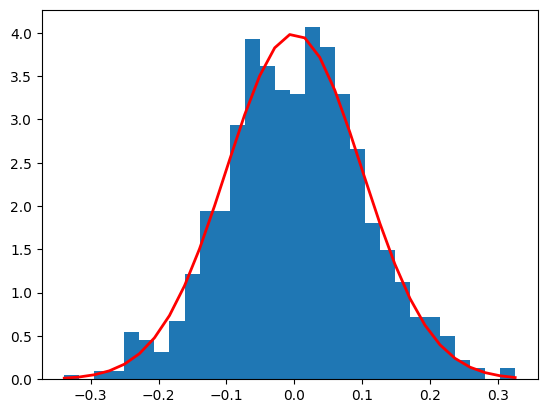

In [47]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Para incluir o 10 entre os valores possíveis, basta trocar o argumento high para 11.

## 3. Matemática com NumPy  <a name="3matematica"></a>



No início deste texto, nós introduzimos o NumPy como uma biblioteca muito utilizada para fazer cálculos numéricos. Vamos ver então as operações matemáticas disponíveis no NumPy.

A primeira coisa a se observar é que as operações matemáticas básicas, como usadas no Python, podem ser usadas também para ndarrays. Só temos que lembrar sempre que elas são aplicadas elemento a elemento.

In [48]:
vec1 = np.array([2., 4., 6., 8.])
vec2 = np.array([1., 2., 3., 4.])


In [49]:
vec1 + vec2                    # Soma

array([ 3.,  6.,  9., 12.])

In [50]:
vec1 - vec2                    # subtração

array([1., 2., 3., 4.])

In [51]:
vec1 * vec2                    # Multiplicação

array([ 2.,  8., 18., 32.])

In [52]:
vec1 / vec2                    # Divisão

array([2., 2., 2., 2.])

In [53]:
vec1 ** vec2                   # exponenciação

array([2.000e+00, 1.600e+01, 2.160e+02, 4.096e+03])

A notação com este "e" minúsculo significa que o número está escrito em notação científica, isto é, em potências de 10. Assim, `4.096e+03` significa `4096` (pois multiplicamos o número por 1000, que é dez elevado a 3). Ainda nesta linha, `2.160e+02` significa `216`.

O NumPy também consegue fazer operações entre arrays e números (chamadas operações com escalares).

In [55]:
vec2

array([1., 2., 3., 4.])

In [54]:
vec2 + 2                 # Somar

array([3., 4., 5., 6.])

In [56]:
vec2 - 2                 # Subtrair

array([-1.,  0.,  1.,  2.])

In [57]:
vec2 * 2                 # Multiplicar

array([2., 4., 6., 8.])

In [58]:
vec2 / 2                 # Dividir

array([0.5, 1. , 1.5, 2. ])

In [60]:
vec2 ** 2                   # Potência (elevar a um número)

array([ 1.,  4.,  9., 16.])

In [61]:
vec2 += 2                # Incrementar

In [63]:
vec2 = vec2 + 2

In [62]:
vec2

array([3., 4., 5., 6.])

In [ ]:
vec2

Agora uma dúvida é: se os nossos ndarrays tiverem formatos diferentes, então o NumPy apenas retorna um erro?

Depende do caso. Ele consegue fazer a operação se a diferença entre os formatos seguirem algumas regras que veremos abaixo. Nestes casos, ele faz o que chamamos de **Broadcasting**.

Se a diferença entre os formatos não seguirem as regrinhas necessárias para realizar broadcasting, então o NumPy retorna de fato um erro.

In [64]:
a = np.array([1, 2, 3])
b = np.array([2, 2])
a * b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

### 3.1. Broadcasting  <a name="31broadcasting"></a>

O que fizemos, nas operações com escalar, é um tipo de broadcasting. Você pode imaginar que o que está acontecendo é o seguinte:
- pegue o seu número,
- crie um ndarray, de mesmo formato que o primeiro, mas cujos valores são o seu número.

![broadcasting01](https://s3-sa-east-1.amazonaws.com/lcpi/dec6164e-6fc2-4e13-8e83-047617a2f89b.png "broadcasting escalar")

(**Fonte:** Tutoriais oficiais do NumPy [\[2\]](#2))

Na imagem acima (que foi tirada dos tutoriais oficiais do NumPy), nota que o valor 2 é "esticado". Ele é repetido ao longo do eixo 0 até ter um ndarray de formato (3,).

Essa ideia pode ser generalizada. Sempre que fizer sentido "esticar" (ou repetir) o array menor até ele ficar com o mesmo formato do maior, então o NumPy consegue realizar uma operação de broadcasting.

In [65]:
matrix = np.array([[0, 0, 0],
                   [10, 10, 10],
                   [20, 20, 20],
                   [30, 30, 30]])
vec = np.array([1, 2, 3])
matrix + vec

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [66]:
vec2 = np.array([[1], 
                 [2], 
                 [3],
                 [4]])
matrix + vec2

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [67]:
matrix2 = np.array([[1,2,3], [2,3,4], [3,4,5],[4,5,6]])
matrix + matrix2

array([[ 1,  2,  3],
       [12, 13, 14],
       [23, 24, 25],
       [34, 35, 36]])


![broadcasting02](https://s3-sa-east-1.amazonaws.com/lcpi/ab17651c-1154-4ea1-a716-09e203f49060.png "broadcasting array")

(**Fonte:** Tutoriais oficiais do NumPy [\[2\]](#2))

A imagem acima mostra o que está acontecendo no código de exemplo que demos.

Mas por que colocamos a expressão "sempre que fizer sentido"? O motivo é que a única coisa que o NumPy aceita fazer é repetir o array menor diversas vezes na direção de uma dimensão. Ele não reajusta o seu array!

![not_broadcasting](https://s3-sa-east-1.amazonaws.com/lcpi/862c983a-f9b3-4474-80e2-b807f15d5a7b.png "not broadcasting")

(**Fonte:** Tutoriais oficiais do NumPy [\[2\]](#2))

In [68]:
matrix = np.array([[0, 0, 0],
                   [10, 10, 10],
                   [20, 20, 20],
                   [30, 30, 30]])
vec = np.array([1, 2, 3, 4])
matrix + vec

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

É interessante notar que essa "esticada" para realizar o broadcast só pode ser feita em 1 eixo. Mesmo que fosse possível copiar o array menor até ele ter o mesmo formato do array maior, se para isso precisarmos fazer cópias ao longo de 2 eixos, então o NumPy retorna um erro.

In [69]:
a = np.array([[1, 2, 3, 4],
              [3, 4, 5, 6],
              [7, 8, 9, 10]])
b = np.array([2, 2])
a * b

ValueError: operands could not be broadcast together with shapes (3,4) (2,) 

In [70]:
b = np.array([[2, 2]])
a * b

ValueError: operands could not be broadcast together with shapes (3,4) (1,2) 

### 3.2. Funções matemáticas  <a name="32funcoesmath"></a>

Além de fazer operações matemáticas entre arrays, também podemos usar funções matemáticas conhecidas. O NumPy possui milhares de funções já implementadas. Por exemplo, ele possui as funções trigonométricas.

Função seno:

In [71]:
x = np.array([1, 2, 3, 4])
np.sin(x)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [74]:
# np.sin(180)

-0.8011526357338304

In [72]:
?np.sin

Call signature:  np.sin(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'sin'>
File:            c:\users\gnlin\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages\numpy\__init__.py
Docstring:      
sin(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric sine, element-wise.

Parameters
----------
x : array_like
    Angle, in radians (:math:`2 \pi` rad equals 360 degrees).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, t

Função cosseno:

In [75]:
x = np.array([1, 2, 3, 4])
np.cos(x)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362])

O NumPy também possui o valor de constantes matemáticas comuns, como o π ("pi").

In [76]:
x = np.array([0, np.pi / 2 , np.pi, 3 * np.pi / 2, 2 * np.pi])
np.sin(x)

array([ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00,
       -2.4492936e-16])

In [ ]:
1/10000000000000000

Os valores `1.2246468e-16` e `-2.4492936e-16` representam o número zero. O motivo de não estar zerado é que nem todas as operações com números de ponto flutuante (números reais com decimal) conseguem ser perfeitamente representadas pelo computador. Números de ponto flutuante sempre tem um grau de imprecisão. Então dentro da precisão do nosso cálculo, esses valores são basicamente o mesmo que zero.

Depois das funções trigonométricas, vamos ver a função exponencial.

In [77]:
x = np.array([1, 2, 3, 4])
np.exp(x)

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

Também existe a constante "e" (número euleriano) no NumPy. De fato, a função exponencial `np.exp(x)` nada mais é do que o número euleriano elevado a x.
$$e^{x}$$

Assim, também podemos fazer a mesma conta abaixo.

In [78]:
x = np.array([1, 2, 3, 4])
np.e ** x

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

Como falamos, existem milhares de funções matemáticas nativamente no NumPy, e todas são muito úteis para fazermos cálculos matemáticos computacionais. Porém, se tentarmos listar todas, precisaríamos de um texto insanamente maior. Então melhor ficarmos só com uma ou outra mesmo.

Temos falado, ao longo do texto, sobre o poder e eficiência do NumPy. Do ponto de vista de escrever código, uma enorme vantagem do NumPy é que podemos escrever equações matemáticas complicadas para todos os elementos do nosso array da mesma forma que escreveríamos no papel.

Aqui entra em foco a ideia de "operações vetorizadas", que encontramos antes. No fim das contas, conseguimos escrever tudo de forma vetorizada no NumPy.

Imagine a equação abaixo:
$$ e^{x} + sin(x) $$

Se quisermos achar o valor dela para diversos valores de "x" entre -1 e 2 no Python, teríamos que fazer um loop iterativo. No NumPy, a operação é mais clara e direta.

In [79]:
x = np.linspace(-1, 2, 10)
np.exp(x) + np.sin(x)

array([-0.47359154, -0.10495268,  0.38933661,  1.        ,  1.72280712,
        2.56610384,  3.55975281,  4.7656058 ,  6.28989801,  8.29835353])

Por fim, o último conceito essencial de se conhecer quanto a operações matemáticas no NumPy é o de número infinito e de NaN (not a number).

O NumPy possui duas constantes, `np.inf` e `np.NaN` que representam um "número infinito" e um erro, respectivamente.

O "número infinito" é um valor de ponto flutuante que é maior que qualquer outro número. Se colocarmos um sinal negativo, ele vira "menos infinito", e passa a ser menor que qualquer outro número.

In [80]:
np.inf > 3823748932489

True

In [81]:
-np.inf < -9832743293278423

True

Já o NaN é um valor indefinido. Sempre que nossa operação não fizer sentido, o numpy retorna um NaN.

In [82]:
np.float64(0) / np.float64(0)

C:\Users\gnlin\AppData\Local\Temp\ipykernel_74368\3686957759.py:1: RuntimeWarning: invalid value encountered in double_scalars
  np.float64(0) / np.float64(0)


nan

In [83]:
# np.float64('cinco')

ValueError: could not convert string to float: 'cinco'

O cuidado que devemos tomar com o NaN é que todas as operações entre um número e um NaN passam a ser NaN.

In [84]:
np.NaN + 44

nan

In [ ]:
# where col not in (' ') AND COL IS NOT NULL

In [85]:
print(0.1+0.2)

0.30000000000000004


## 4. Álgebra Linear e Estatística básica  <a name="4algelinestat"></a>

### 4.1. Álgebra Linear  <a name="41algelin"></a>

Da definição do Wikipédia:

Álgebra linear é um ramo da matemática que surgiu do estudo detalhado de sistemas de equações lineares [...]. A álgebra linear utiliza alguns conceitos e estruturas fundamentais da matemática como vetores,[...] e matrizes.

Independente da definição exata, a questão é que a álgebra linear estuda vetores e matrizes. Como vimos até aqui, o NumPy opera de forma bastante análoga à vetores e matrizes.

O que não vimos ainda é como o NumPy nos permite também executar operações típicas da álgebra linear, como "produto entre matrizes".

De fato, o NumPy tem a capacidade de realizar um "produto escalar" entre vetores, de fazer o produto de uma matriz por um vetor, e de fazer o produto entre matrizes.

Vamos relembrar o que são essas operações. O produto escalar de dois vetores consiste em multiplicar os dois, elemento a elemento, e depois somar os resultados de cada par de elementos.

![inner_prod](https://s3-sa-east-1.amazonaws.com/lcpi/d331eb96-4d9e-4cf4-98f6-23fdd8bebf7a.png)

(Exemplo de produto escalar, ou "produto interno") <br>
(**Fonte:** Imagem original Ada)

A sintaxe do NumPy é dada abaixo.

In [86]:
vec1 = np.array([1, 2, 3])
vec2 = np.array([2, 2, 3])
vec1.dot(vec2)

15

Também podemos usar o operador `@`.

In [87]:
vec1 = np.array([1, 2, 3])
vec2 = np.array([2, 2, 3])
vec1 @ vec2

15

O produto de matriz e vetor é dado fazendo algo semelhante ao produto escalar. Para cada linha da matriz, a gente faz o produto escalar entre aquela linha e o vetor. O resultado então vai ser o elemento que se encontra na mesma posição da linha.

![matrix_vec](https://s3-sa-east-1.amazonaws.com/lcpi/364aee03-990f-49ca-a3b8-19881f09be3c.svg)

(**Fonte:** Usuária Claudia4 do site Wikimedia Commons, disponível em https://upload.wikimedia.org/wikipedia/commons/2/22/Matrix_vector_multiplication.svg)

As possibilidades de sintaxe do NumPy seguem abaixo.

In [88]:
matrix = np.array([[1, 1, 1],
                       [1, 2, 3],
                       [1, 1, 1]])

In [89]:
vec2 = np.array([2, 2, 3])

In [90]:
matrix.dot(vec2)

array([ 7, 15,  7])

In [91]:
matrix @ vec2

array([ 7, 15,  7])

Na multiplicação entre matrizes, nós multiplicamos a linha da matriz da esquerda pela coluna da matriz da direita, elemento a elemento, e somamos o resultado (produto escalar entre a linha da matriz da esquerda com a coluna da matriz da direita) para obter uma nova matriz.

Neste caso, quando fazemos o produto interno da linha N com a coluna M, nós obtemos o elemento que ficará na posição (N,M) na nova matriz.

![matrix_mult01](https://s3-sa-east-1.amazonaws.com/lcpi/7569206e-95e5-405b-8bff-6b7901590149.svg)

![matrix_mult02](https://s3-sa-east-1.amazonaws.com/lcpi/e7217171-a90e-483e-8af4-0b73a463951c.svg){width="400", height="300"}

(**Fonte:** Usuários Guy vandegrift e Bilou do site Wikimedia Commons, disponíveis em
https://upload.wikimedia.org/wikipedia/commons/d/d9/Hands_matrix_multiplication.svg e https://upload.wikimedia.org/wikipedia/commons/2/22/Matrix_vector_multiplication.svg)

Como nos casos anteriores, abaixo temos a sintaxe do NumPy.

In [92]:
matrix1 = np.array([[1, 1, 1],
                        [1, 2, 3],
                        [1, 1, 1]])

In [93]:
matrix2 = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]])

In [94]:
matrix1.dot(matrix2)

array([[3, 3, 3],
       [6, 6, 6],
       [3, 3, 3]])

In [95]:
matrix1 @ matrix2

array([[3, 3, 3],
       [6, 6, 6],
       [3, 3, 3]])

In [ ]:
1*1 + 1*1 + 1*1

In [97]:
matrix1

array([[1, 1, 1],
       [1, 2, 3],
       [1, 1, 1]])

In [98]:
matrix2

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [96]:
matrix1 * matrix2

array([[1, 1, 1],
       [1, 2, 3],
       [1, 1, 1]])

No campo da álgebra linear, existem algumas matrizes especiais muito úteis. O NumPy possui métodos de criação para a maioria delas.

A mais importante é a chamada matriz identidade. Ela é uma matriz quadrada (mesmo número de linhas e colunas) com diagonal 1, e os outros valores 0.

In [99]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Ela se chama identidade pois qualquer matriz multiplicada pela identidade (por produto de matrizes) dá a própria matriz.

In [100]:
matrix1 @ np.identity(3)

array([[1., 1., 1.],
       [1., 2., 3.],
       [1., 1., 1.]])

Outra operação comum com matrizes é a transposição.

![transposition](https://s3-sa-east-1.amazonaws.com/lcpi/3d11b2c4-65cb-463a-9ccc-b858b065d2b3.png "Transposição")

(**Fonte:** Imagem original Ada)

A transposição pode ser feita com a função `np.transpose`.

In [102]:
a = np.array([[1,2],[3,4],[5,6]])

In [103]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [105]:
a.shape

(3, 2)

In [104]:
np.transpose(a)

array([[1, 3, 5],
       [2, 4, 6]])

In [106]:
a.reshape(2,3)

array([[1, 2, 3],
       [4, 5, 6]])

Outra forma é usando o atributo `T`:

In [107]:
a.T

array([[1, 3, 5],
       [2, 4, 6]])

Operações mais específicas se encontram no módulo `linalg` do NumPy.

Um exemplo é encontrar o determinante de uma matriz. O determinante é um número característico de uma dada matriz, e que se relaciona com diversas propriedades dela.

In [108]:
c = np.identity(3)

In [109]:
print(c)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [110]:
np.linalg.det(c)

1.0

Para encontrar todas as funções específicas de Álgebra Linear que têm no NumPy, você pode acessar o link https://numpy.org/doc/stable/reference/routines.linalg.html.

Algum exemplo de funções já implementadas na biblioteca:
- Traço
- Decomposição de vetores
- Autovalor/autovetor
- Norma de Matriz
- Inversa
- Etc...

### 4.2. Estatística  <a name="42estat"></a>


Por fim, o NumPy também possui várias funções básicas de estatística, como mínimo, máximo, média, mediana, etc.

In [111]:
import numpy as np

In [112]:
stats = np.array([[1, 2, 3], [4, 5, 6]])
stats

array([[1, 2, 3],
       [4, 5, 6]])

In [113]:
np.min(stats)

1

In [114]:
np.max(stats)

6

In [115]:
np.min(stats, axis=1) # Pega o menor valor de cada linha

array([1, 4])

In [116]:
np.max(stats, axis=0) # Pega o maior valor de cada coluna

array([4, 5, 6])

In [117]:
np.sum(stats, axis=0) # Faz a soma dos valores de cada coluna

array([5, 7, 9])

In [118]:
np.mean(stats) # Valor médio de todos os elementos do array

3.5

In [119]:
np.mean(stats, axis=0) # Valor médio de cada coluna do array

array([2.5, 3.5, 4.5])

In [120]:
np.mean(stats, axis=1) # Valor médio de cada linha do array

array([2., 5.])


**Referências:**
--------------

1. <a name="1"></a> Documentação NumPy, disponível em https://NumPy.org/doc/stable/index.html ;
2. <a name="2"></a> Tutorial NumPy, disponível em https://NumPy.org/doc/stable/user/absolute_beginners.html ;
3. <a name="3"></a> Funções matemáticas do NumPy, disponível em https://numpy.org/doc/stable/reference/routines.math.html
4. <a name="4"></a> Álgebra linear com NumPy, disponível em https://numpy.org/doc/stable/reference/routines.linalg.html
5. <a name="5"></a> Tutorial NumPy da ABRACD, disponível em https://abracd.org/tutorial-numpy-os-primeiros-passos-em-computacao-numerica-e-tratamento-de-dados/

[NumPy_docs]: https://NumPy.org/doc/stable/index.html
[NumPy_install]: https://NumPy.org/install/